In [82]:
import pandas as pd 
import numpy as np 
import operator
import networkx as nx
from textblob import Word
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

In [2]:
playlists_titles = pd.read_csv("/home/karim/Documents/BalancedDatasetDeezer/RawData/sample_playlists_title.tsv", delimiter = '\t')

In [48]:
titles = playlists_titles.title.values
vocab_dict = {}
for title in titles:
    for word in title.split(" "):
        word = word.lower()
        # remove panctuations
        word = word.translate(str.maketrans('', '', string.punctuation))
        word = ''.join([i for i in word if not i.isdigit()])
        # remove numbers 
        if word in vocab_dict:
            vocab_dict[word] +=1 
        elif (word!='' and len(word) >2): 
            vocab_dict[word] = 1

In [49]:
sorted_vocab = sorted(vocab_dict.items(), key=lambda kv: kv[1],reverse=True)
sorted_vocab

[('dance', 120863),
 ('chill', 81742),
 ('party', 71437),
 ('summer', 45351),
 ('gym', 39357),
 ('running', 33334),
 ('sad', 32449),
 ('workout', 27910),
 ('relax', 26471),
 ('car', 25780),
 ('work', 25464),
 ('night', 20936),
 ('happy', 19444),
 ('shower', 15866),
 ('sleep', 14451),
 ('songs', 14121),
 ('out', 12919),
 ('club', 11951),
 ('music', 11111),
 ('morning', 10512),
 ('playlist', 9505),
 ('the', 6467),
 ('and', 4846),
 ('mix', 4659),
 ('hits', 4588),
 ('time', 4242),
 ('rock', 4203),
 ('tunes', 4022),
 ('good', 3886),
 ('new', 3838),
 ('train', 3676),
 ('for', 3558),
 ('electro', 3383),
 ('rap', 3068),
 ('floor', 3065),
 ('pop', 2833),
 ('house', 2501),
 ('just', 2168),
 ('vibes', 2062),
 ('list', 1997),
 ('song', 1994),
 ('lets', 1983),
 ('tracks', 1845),
 ('hall', 1721),
 ('top', 1617),
 ('mood', 1608),
 ('love', 1338),
 ('old', 1328),
 ('birthday', 1315),
 ('late', 1314),
 ('hard', 1219),
 ('soirée', 1213),
 ('pool', 1208),
 ('all', 1200),
 ('cool', 1184),
 ('baby', 1177),

## Trying random wordnet functions [to replaced with actual code later]

In [17]:
word = Word("plant")
# sysnet objects [a set of synonyms]
word.synsets[:3]
#definitions
word.definitions[:3]
# Accesing specific synset object
plant = word.synsets[1]
# Get all synonyms in this synset
plant.lemma_names()
# Get hypernyms
plant.hypernyms()
# get hyponyms [branchs that fall under this word]
plant.hyponyms()[:3]
# get holonyms: things that the item is contained in
plant.member_holonyms()
# get meronyms: components or substances that make up the item
plant.part_meronyms()

[Synset('hood.n.02'), Synset('plant_part.n.01')]

In [18]:
# Example for computing the distances through the grahp
from textblob.wordnet import Synset
octopus = Synset("octopus.n.02")
nautilus = Synset('paper_nautilus.n.01')
shrimp = Synset('shrimp.n.03')
pearl = Synset('pearl.n.01')
octopus.path_similarity(octopus)  # 1.0
octopus.path_similarity(nautilus)  # 0.33
octopus.path_similarity(shrimp)  # 0.11
octopus.path_similarity(pearl)  # 0.07

0.06666666666666667

## Trying to create a graph based on distance of playlists keywords in wordnet

In [51]:
# Cut words that appears less than 100 times + stops words and panctuatio
stop = stopwords.words('english') + list(string.punctuation)

filtered_vocab = dict()
# Remove entiries that occur less than 100 times, is a stop word or doesn't exist in Wordnet
for (key, value) in vocab_dict.items():
    if (value >= 100 and key not in stop):
        filtered_vocab[key] = value

In [52]:
filtered_vocab

{'aaa': 103,
 'acoustic': 408,
 'afro': 308,
 'afternoon': 113,
 'album': 140,
 'alex': 152,
 'alone': 114,
 'along': 116,
 'alternative': 136,
 'ambiance': 530,
 'animal': 127,
 'anniv': 301,
 'anniversaire': 154,
 'année': 157,
 'années': 139,
 'anos': 350,
 'ans': 533,
 'anthems': 257,
 'antigas': 178,
 'apéro': 113,
 'aqua': 237,
 'ass': 100,
 'away': 100,
 'baby': 1177,
 'back': 309,
 'bad': 166,
 'bangers': 276,
 'bass': 158,
 'bath': 135,
 'bbq': 137,
 'bday': 279,
 'beach': 855,
 'beat': 221,
 'beats': 535,
 'beautiful': 120,
 'best': 1131,
 'better': 118,
 'big': 188,
 'birthday': 1315,
 'bitch': 465,
 'black': 152,
 'blues': 174,
 'body': 119,
 'boi': 178,
 'boite': 110,
 'boost': 138,
 'boy': 138,
 'break': 131,
 'bro': 114,
 'bus': 133,
 'call': 111,
 'calm': 409,
 'canciones': 208,
 'cant': 129,
 'car': 25780,
 'cardio': 144,
 'chanson': 108,
 'chill': 81742,
 'chilled': 188,
 'christmas': 528,
 'class': 188,
 'classic': 454,
 'classical': 186,
 'classics': 446,
 'club': 1

In [53]:
filtered_sorted_vocab = sorted(filtered_vocab.items(), key=lambda kv: kv[1],reverse=True)
filtered_sorted_vocab

[('dance', 120863),
 ('chill', 81742),
 ('party', 71437),
 ('summer', 45351),
 ('gym', 39357),
 ('running', 33334),
 ('sad', 32449),
 ('workout', 27910),
 ('relax', 26471),
 ('car', 25780),
 ('work', 25464),
 ('night', 20936),
 ('happy', 19444),
 ('shower', 15866),
 ('sleep', 14451),
 ('songs', 14121),
 ('club', 11951),
 ('music', 11111),
 ('morning', 10512),
 ('playlist', 9505),
 ('mix', 4659),
 ('hits', 4588),
 ('time', 4242),
 ('rock', 4203),
 ('tunes', 4022),
 ('good', 3886),
 ('new', 3838),
 ('train', 3676),
 ('electro', 3383),
 ('rap', 3068),
 ('floor', 3065),
 ('pop', 2833),
 ('house', 2501),
 ('vibes', 2062),
 ('list', 1997),
 ('song', 1994),
 ('lets', 1983),
 ('tracks', 1845),
 ('hall', 1721),
 ('top', 1617),
 ('mood', 1608),
 ('love', 1338),
 ('old', 1328),
 ('birthday', 1315),
 ('late', 1314),
 ('hard', 1219),
 ('soirée', 1213),
 ('pool', 1208),
 ('cool', 1184),
 ('baby', 1177),
 ('disco', 1153),
 ('sunday', 1143),
 ('best', 1131),
 ('musique', 1028),
 ('day', 983),
 ('jazz'

In [68]:
# Print words that doesn't exist in Wordnet
for word in filtered_vocab.keys():
    if wordnet.synsets(word):
        continue
    else:
        print(word)

anniv
fête
liste
électro
été
anniversaire
fav
reggaeton
ingles
flo
lofi
español
bro
youre
deezer
dans
alex
rnb
ragga
nrj
chanson
trax
lol
favs
let’s
musique
edm
eletro
apéro
nouvel
bday
musik
compil
canciones
etc
années
mooval
ibiza
boi
cours
antigas
soirée
laura
zumba
danse
douce
vol
spotify
cardio
hiphop
zouk
bbq
wanna
mai
juin
netflix
mariage
année
remix
pre
musica
electro
jamz
boite
hora
muziek
dont
música
flor


In [76]:
# Remove words that doesn't exist in Wordnet
temp_dict = dict()
# Remove entiries that occur less than 100 times, is a stop word or doesn't exist in Wordnet
for (key, value) in filtered_vocab.items():
    if (wordnet.synsets(key)):
        temp_dict[key] = value
filtered_vocab = temp_dict

In [79]:
# Create graph and add nodes from our vocab
G=nx.Graph()
G.add_nodes_from(filtered_vocab.keys())

In [104]:
# Iterate through all nodes and compute the average weight of all the synsets of the two words
# Then add an edge between the two nodes according to this weight. 
# We use the lopped_list to only include nodes we haven't iterated through already 
lopped_list = list(G.nodes).copy()
for x in list(G.nodes()):
    lopped_list.remove(x)
    for y in lopped_list:
        if(x!=y):
            word1 = Word(x)
            word2 = Word(y)
            weight = 0
            counter = 0 
            for synsets1 in word1.synsets:
                for synsets2 in word2.synsets:
                    if(synsets1.path_similarity(synsets2) != None):
                        weight += synsets1.path_similarity(synsets2)
                        counter += 1 
            if (counter != 0):
                weight = weight/counter
                G.add_edge(x,y,weight=weight)

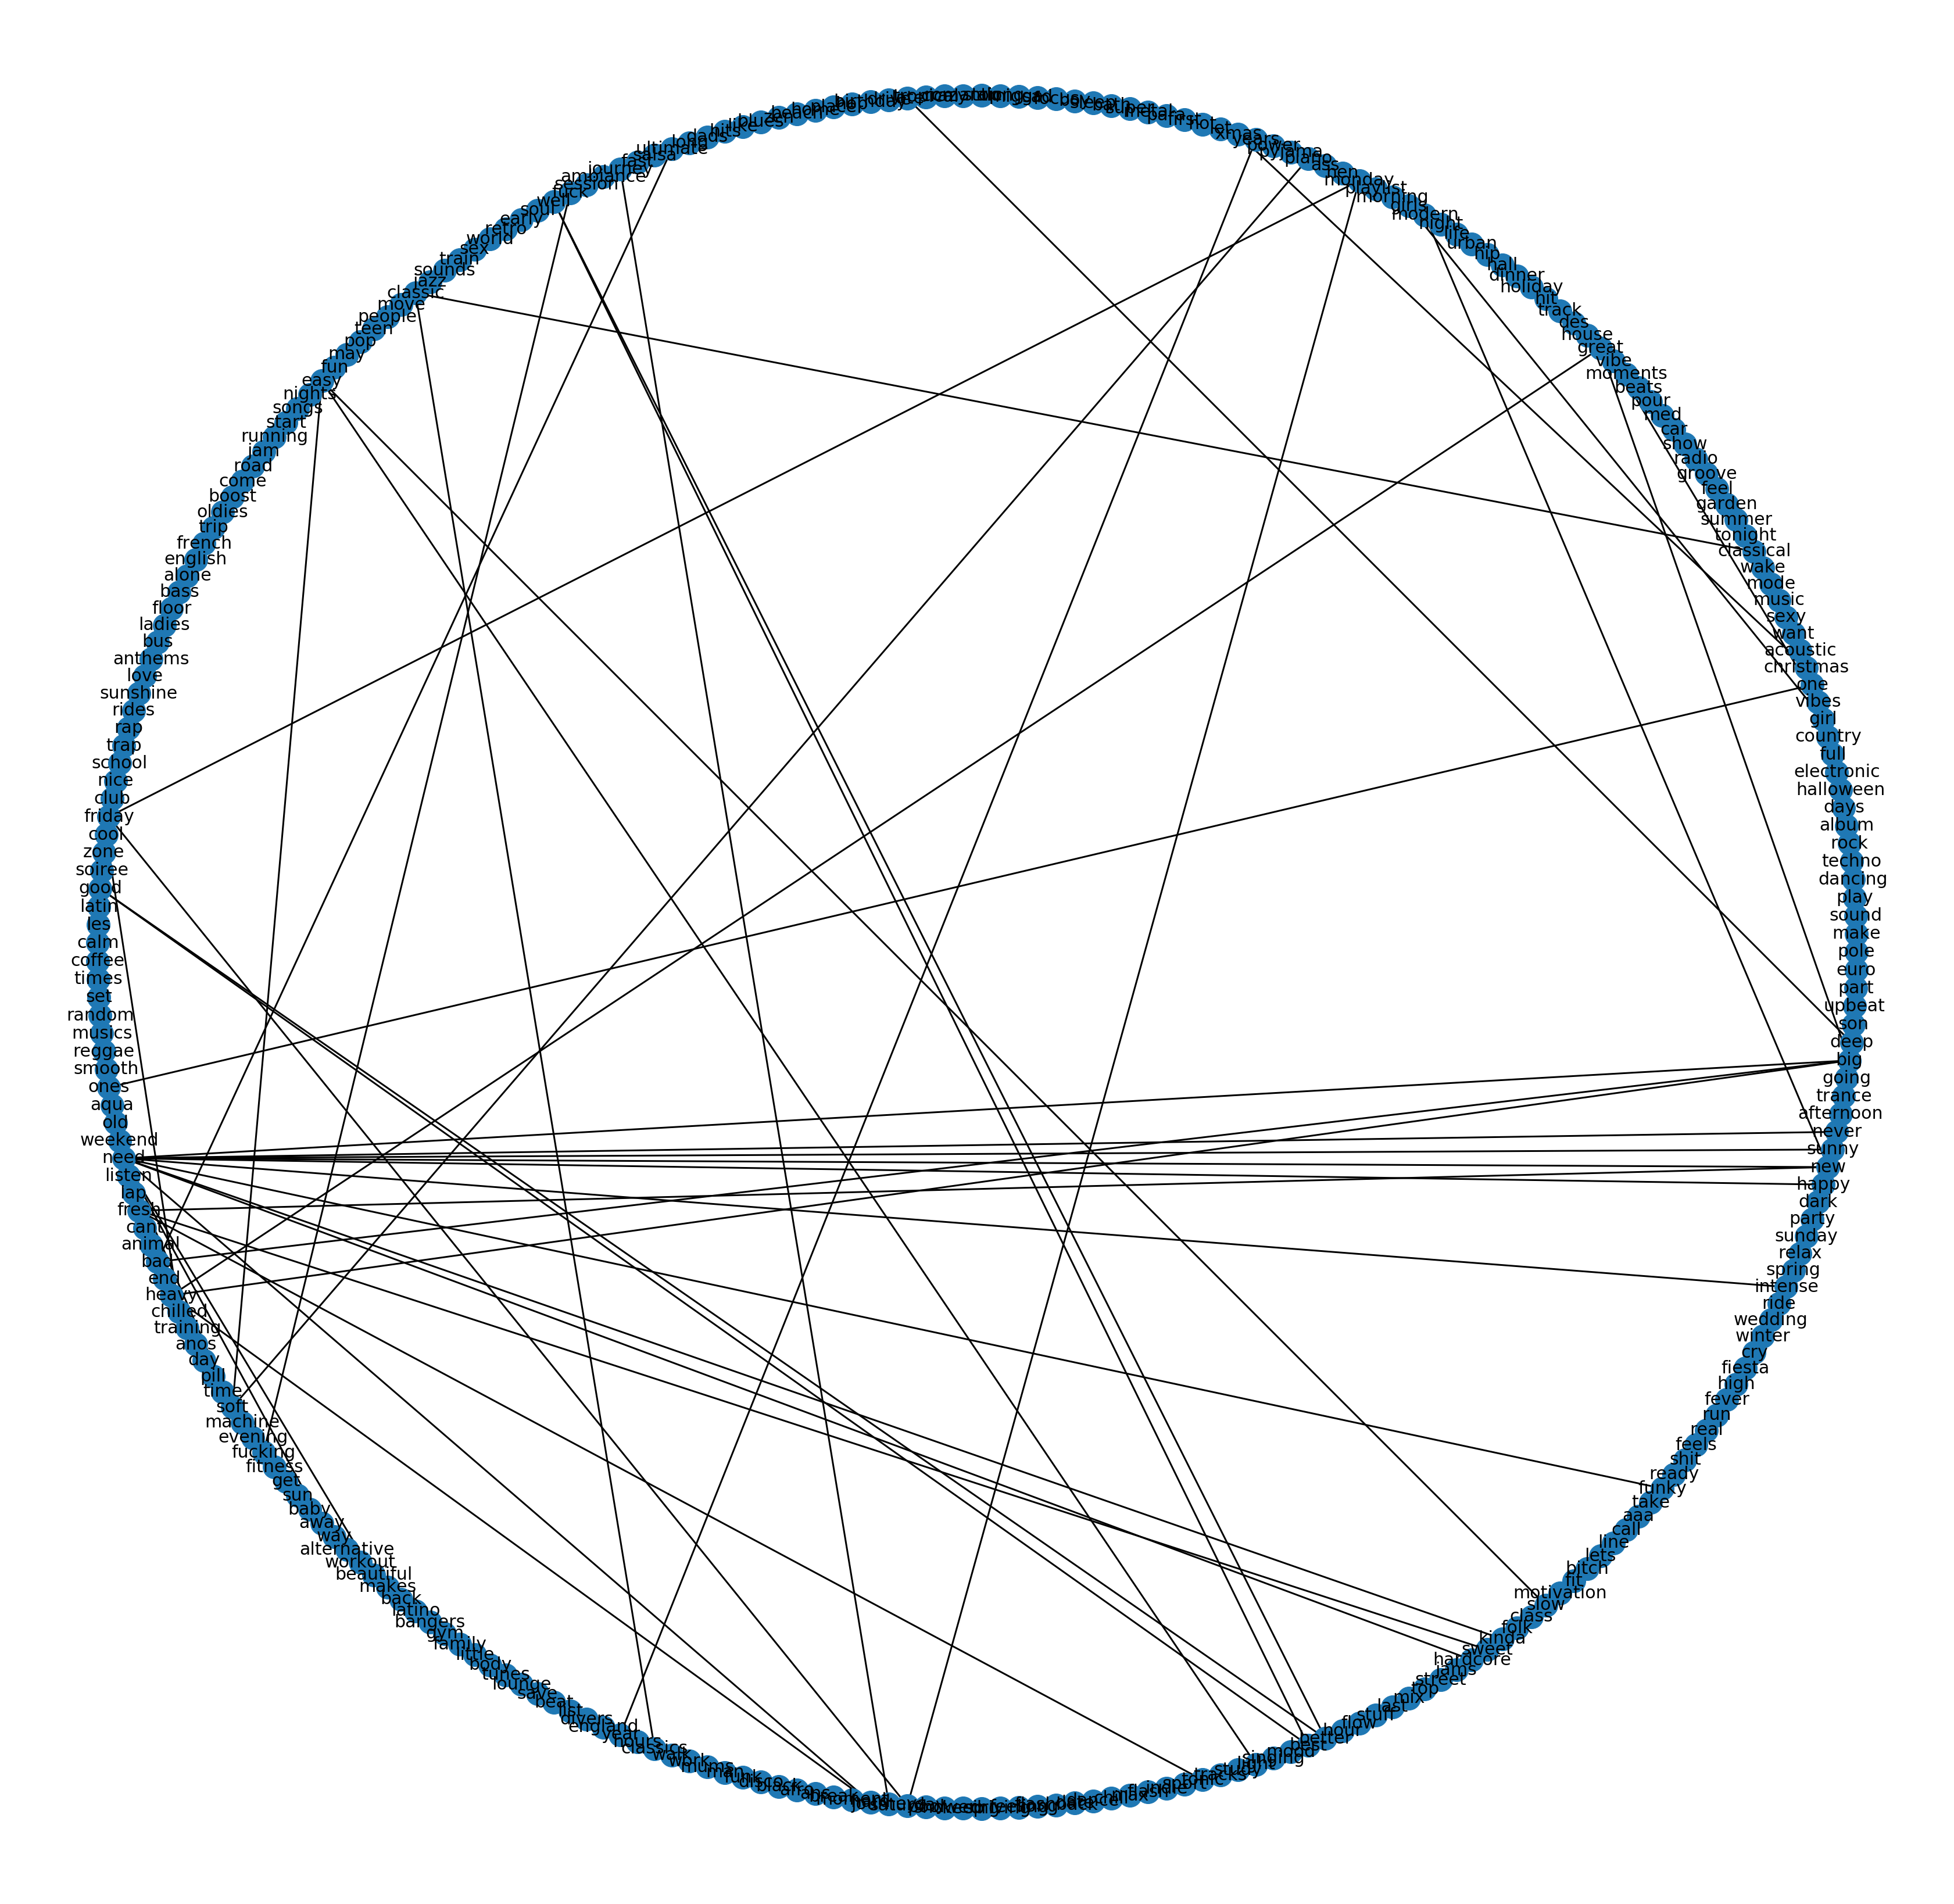

In [122]:
plt.figure(1,figsize=(60,60)) 
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.3]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.3]
pos = nx.shell_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=1600)
# edges
# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=3)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=2, alpha=0.0, edge_color='b', style='dashed')
nx.draw_networkx_labels(G, pos, font_size=30, font_family='sans-serif')
plt.axis('off')
plt.savefig("/home/karim/Documents/research/sourceCode/context_classification_cnn/graph_playlists.png")
plt.show()

In [150]:
# Check edges with high weights [>0.5]
for (u, v, wt) in G.edges.data('weight'):
    if wt > 0.3: print('(%s, %s, %.3f)' % (u, v, wt))

(girl, girls, 0.408)
(vibes, vibe, 0.533)
(one, ones, 0.533)
(christmas, xmas, 0.562)
(classical, classic, 0.633)
(great, heavy, 0.403)
(great, big, 1.000)
(modern, new, 1.000)
(monday, friday, 0.333)
(monday, saturday, 0.333)
(piano, soft, 1.000)
(years, year, 0.338)
(late, deep, 1.000)
(ultimate, bad, 0.333)
(journey, journeys, 0.508)
(fuck, fucking, 0.482)
(well, best, 0.306)
(well, better, 0.305)
(classic, classics, 0.388)
(easy, light, 1.000)
(easy, slow, 1.000)
(easy, soft, 1.000)
(friday, saturday, 0.333)
(cool, chilled, 0.362)
(good, best, 0.680)
(good, better, 0.658)
(need, sunny, 0.306)
(need, funky, 0.306)
(need, new, 0.306)
(need, kinda, 0.306)
(need, fresh, 0.306)
(need, soft, 0.306)
(need, away, 0.306)
(need, beautiful, 0.306)
(need, hard, 0.306)
(need, hardcore, 0.306)
(need, intense, 0.306)
(need, happy, 0.306)
(need, never, 0.306)
(need, big, 0.306)
(fresh, tonic, 1.000)
(fresh, sweet, 1.000)
(fresh, new, 1.000)
(bad, big, 1.000)
(heavy, hard, 1.000)
(heavy, big, 1.000

In [158]:
df = nx.to_pandas_edgelist(G)
df.sort_values(by=['weight'],ascending = False)

,source,target,weight
23572,easy,light,1.000000
30402,fresh,tonic,1.000000
30760,bad,big,1.000000
30946,heavy,hard,1.000000
11824,modern,new,1.000000
30404,fresh,new,1.000000
31002,heavy,big,1.000000
30403,fresh,sweet,1.000000
13348,piano,soft,1.000000
23574,easy,soft,1.000000


## Working on the word sense disambiguation

In [161]:
from pywsd import disambiguate
from pywsd.similarity import max_similarity as maxsim

Warming up PyWSD (takes ~10 secs)... took 5.404879331588745 secs.


In [164]:
disambiguate(titles[1])

[('dance', Synset('dancing.n.01')),
 ('on', None),
 ('the', None),
 ('table', Synset('table.n.05'))]

In [171]:
playlists_titles = pd.read_csv("/home/karim/Documents/BalancedDatasetDeezer/RawData/sample_playlists_title.tsv", delimiter = '\t')

In [172]:
len(playlists_titles)

612049